In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from pylab import rcParams
#rcParams['figure.figsize']=20,10

In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")
data_by_month.head()

,Truck
0,39
1,41
2,57
3,61
4,54


In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')
#index

In [4]:
data_by_month.index=index
data_by_month.head()

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54


In [5]:
month=np.linspace(1,96,96).reshape(-1,1)

In [6]:
data_by_month['Month']=month.astype(int)
data_by_month

,Truck,Month
Date,,
2011-01-31,39,1
2011-02-28,41,2
2011-03-31,57,3
2011-04-30,61,4
2011-05-31,54,5
...,...,...
2018-08-31,10,92
2018-09-30,27,93
2018-10-31,19,94


In [7]:
#data_by_month['Month']=data_by_month.index.month
#data_by_month

In [8]:
y=data_by_month.iloc[:,0].values.reshape(-1,1)

In [9]:
X=data_by_month.iloc[:,1].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33 ,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 1), (32, 1), (64, 1), (32, 1))

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred=lr.predict(X_test)
y_pred.shape

(32, 1)

In [16]:
mean_absolute_error(y_test,y_pred)

6.479251298956941

In [17]:
r2_score(y_test,y_pred)

0.5941098027535703

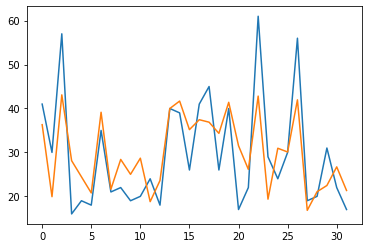

In [18]:
plt.plot(y_test)
plt.plot(y_pred)

In [19]:
#plt.plot(y_test.sort_index().values)
#plt.plot(y_pred_df.sort_index().values)
#plt.plot(data_by_month.Truck)
#plt.plot(y_pred_df)

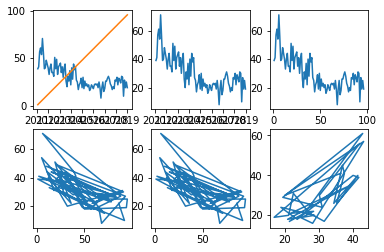

In [20]:
fig,axs=plt.subplots(nrows=2,ncols=3)
axs[0,0].plot(data_by_month)
axs[0,1].plot(data_by_month.Truck)
axs[0,2].plot(X,y)
axs[1,0].plot(X_train,y_train)
axs[1,1].plot(X_train,y_train)
axs[1,2].plot(y_pred,y_test)

1 . degree error: 62.10080380155799
2 . degree error: 35.063482761994
3 . degree error: 37.29640547992086
4 . degree error: 37.990257865229395
5 . degree error: 36.58621348530335
6 . degree error: 38.50173534744505
7 . degree error: 44.89239517205681
8 . degree error: 40.477137132463724
9 . degree error: 38.14985226874815
10 . degree error: 41.162441913794524
11 . degree error: 48.84130951396912
12 . degree error: 51.01549136167948
13 . degree error: 54.002991494143814
14 . degree error: 58.35096679922583
15 . degree error: 64.87756598919839
16 . degree error: 74.3620981299303
17 . degree error: 87.0317969880824
18 . degree error: 102.57420028733445
19 . degree error: 119.50538868475242
20 . degree error: 138.08332542049436
21 . degree error: 157.92761566409501
22 . degree error: 125.80934604555631
23 . degree error: 125.0559330794911
24 . degree error: 123.63898593942372
25 . degree error: 122.36847936430803
26 . degree error: 121.66709867026924
27 . degree error: 121.6106894605949
28

Text(0, 0.5, 'MSE')

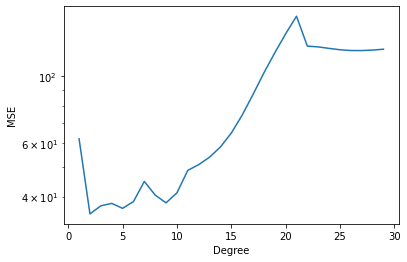

In [21]:
mse = []
degrees = np.arange(1,30)
min_mse, min_deg = 1e10, 0

for deg in range(1,30):
    poly_features=PolynomialFeatures(degree=deg)
    x_poly_train=poly_features.fit_transform(X_train)
    
    poly_reg =LinearRegression()
    poly_reg.fit(x_poly_train,y_train)
    
    x_poly_test = poly_features.fit_transform(X_test)
    y_pred=poly_reg.predict(x_poly_test)
    poly_mse=mean_squared_error(y_test,y_pred)
    mse.append(poly_mse)
    print(deg,'. degree error:',poly_mse)
    
    if min_mse > poly_mse:
        min_mse = poly_mse
        min_deg = deg

print('Best degree {} with MSE {}'.format(min_deg, min_mse))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, mse)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
    

In [22]:
pl=PolynomialFeatures(degree=2)

In [23]:
X_train=pl.fit_transform(X_train)
X_test=pl.fit_transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((64, 3), (32, 3), (64, 1), (32, 1))

In [24]:
pl2=LinearRegression()

In [25]:
pl2.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=pl2.predict(X_test)

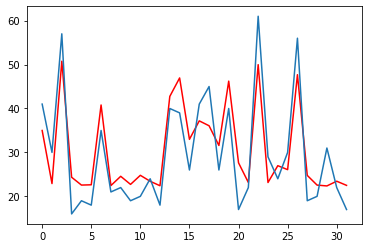

In [28]:
plt.plot(y_pred,color='r')
plt.plot(y_test)

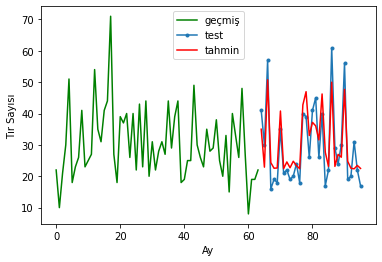

In [29]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="geçmiş")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="test")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="tahmin")
plt.ylabel('Tır Sayısı')
plt.xlabel('Ay')
plt.legend()
plt.show();

In [30]:
mean_absolute_error(y_test,y_pred)

5.287942546601215

In [31]:
r2_score(y_test,y_pred)

0.7708254472858291

In [32]:
'''
mse = []
degrees = np.arange(1,30)
min_mse, min_deg = 1e10, 0

for deg in range(1,30):
    poly_features=PolynomialFeatures(degree=deg)
    x_poly=poly_features.fit_transform(X)
    
    poly_reg =LinearRegression()
    poly_reg.fit(x_poly,y)
    y_pred=poly_reg.predict(x_poly)
    poly_mse=mean_squared_error(y,y_pred)
    mse.append(poly_mse)
    print(deg,'. degree error:',poly_mse)
    
    if min_mse > poly_mse:
        min_mse = poly_mse
        min_deg = deg

print('Best degree {} with MSE {}'.format(min_deg, min_mse))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, mse)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('MSE')
    '''

"\nmse = []\ndegrees = np.arange(1,30)\nmin_mse, min_deg = 1e10, 0\n\nfor deg in range(1,30):\n    poly_features=PolynomialFeatures(degree=deg)\n    x_poly=poly_features.fit_transform(X)\n    \n    poly_reg =LinearRegression()\n    poly_reg.fit(x_poly,y)\n    y_pred=poly_reg.predict(x_poly)\n    poly_mse=mean_squared_error(y,y_pred)\n    mse.append(poly_mse)\n    print(deg,'. degree error:',poly_mse)\n    \n    if min_mse > poly_mse:\n        min_mse = poly_mse\n        min_deg = deg\n\nprint('Best degree {} with MSE {}'.format(min_deg, min_mse))\nfig = plt.figure()\nax = fig.add_subplot(111)\nax.plot(degrees, mse)\nax.set_yscale('log')\nax.set_xlabel('Degree')\nax.set_ylabel('MSE')\n    "